<a href="https://colab.research.google.com/github/ahmedhas32/Data-science-projects/blob/master/bank_repayment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I will work on the following data sets based on 3 main stages 

### Stage 1 : Exploring , and Manipulating each of the given datasets
    A - Loan
    B - Payment
    C - Clarity Underwriting

### Stage 2 : Composing dataset to use in prediction
     A - merging datasets
     B - generating more features
     C - Replacing missing values
     D - Encoding categorical predictors


### Stage 3 : Prediction and model testing
     A - Checking variability of dependent variable across selected features
     B - Transforming Data
     C - Fitting model
        

### Importing necessary libraries

In [ ]:
!pip install arabic_reshaper

import arabic_reshaper


  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.1-cp36-none-any.whl size=16503 sha256=5155ce9a612bc8c7d29458468b290058367444b51a86714772eef82bbce99f25
  Stored in directory: /root/.cache/pip/wheels/62/52/d8/bd0dcbf00f9e77e3bd0184285ed77dfa9c475dac494a5353d1
Successfully built arabic-reshaper


In [ ]:
import torch

In [ ]:
#features=list(features)
!pip install python-bidi
from bidi.algorithm import get_display

In [ ]:
import csv as csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict
from sklearn import preprocessing
from datetime import datetime
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlrd
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import LabelEncoder

## Loading Datasets

In [ ]:
clarity_underwriting_variable = pd.read_csv('/content/drive/My Drive/clarity_underwriting_variables.csv')

In [ ]:
loan = pd.read_csv('/content/drive/My Drive/loan.csv')

In [ ]:
payment = pd.read_csv('/content/drive/My Drive/payment.csv')

##  Stage 1 : Exploring , and Manipulating each of the given datasets

### to have an impact about datasets structure let's check the first 5 cases of each one

In [ ]:
loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [ ]:
payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


### To ease dealing with fields of the dataset "clarity_underwriting_variable" we change field names as in the column "column name" in the file clarity under witing dictionary

In [ ]:
column_names= ['CF.fs.bof_ssn_date_unverified','CF.fs.bof_ssn_deceased','CF.fs.credit_prior_age_18','CF.fs.credit_prior_ssn_date','CF.fs.cur_addr_rep_newtrade_only','CF.fs.cur_addr_rep_trade_90_days','CF.fs.dl_format_invalid','CF.fs.dl_inconsistent_wof','CF.fs.in_ssn_date_unverified','CF.fs.in_ssn_deceased','CF.fs.in_ssn_invalid','CF.fs.inq_addr_cautious','CF.fs.inq_addr_high_risk','CF.fs.inq_addr_non_residential','CF.fs.inq_age_lt_ssn_date','CF.fs.inq_current_addr_nof','CF.fs.inq_gt_3_in_last_30_days','CF.fs.inq_onf_addr_conflict','CF.fs.max_num_ssn_ba','CF.fs.onf_addr_cautious','CF.fs.onf_addr_high_risk','CF.fs.onf_addr_non_residential','CF.fs.phone_inconsistent_w_addr','CF.fs.phone_inconsistent_w_state','CF.fs.ssn_belongs_to_another','CF.fs.ssn_frequent_for_another','CF.fs.total_num_fraud_indicators','CF.fs.work_num_prev_cell_num','CF.fs.work_num_prev_home_num','CF.inquiry.1_hr_ago','CF.inquiry.1_min_ago','CF.inquiry.10_mins_ago','CF.inquiry.15_days_ago','CF.inquiry.24_hrs_ago','CF.inquiry.30_days_ago','CF.inquiry.365_days_ago','CF.inquiry.7_days_ago','CF.inquiry.90_days_ago','CF.match.name_addr','CF.match.name_addr_reason_code','CF.match.name_addr_code_desc','CF.match.oa_reason_code','CF.match.oa_result','CF.match.ssn_dob_reason_code','CF.match.phonematchtypedescription','CF.match.ssn_name','CF.match.ssn_name_reason_code','CF.match.ssn_name_code_desc','CF.match.phone_match_result','CF.match.phone_match_type','CF.match.phone_type','CF.match.ssndobmatch','clearFraudScore','underwritingid']

In [ ]:
clarity_underwriting_variable.columns = column_names

In [ ]:
clarity_underwriting_variable.head()

,CF.fs.bof_ssn_date_unverified,CF.fs.bof_ssn_deceased,CF.fs.credit_prior_age_18,CF.fs.credit_prior_ssn_date,CF.fs.cur_addr_rep_newtrade_only,CF.fs.cur_addr_rep_trade_90_days,CF.fs.dl_format_invalid,CF.fs.dl_inconsistent_wof,CF.fs.in_ssn_date_unverified,CF.fs.in_ssn_deceased,CF.fs.in_ssn_invalid,CF.fs.inq_addr_cautious,CF.fs.inq_addr_high_risk,CF.fs.inq_addr_non_residential,CF.fs.inq_age_lt_ssn_date,CF.fs.inq_current_addr_nof,CF.fs.inq_gt_3_in_last_30_days,CF.fs.inq_onf_addr_conflict,CF.fs.max_num_ssn_ba,CF.fs.onf_addr_cautious,CF.fs.onf_addr_high_risk,CF.fs.onf_addr_non_residential,CF.fs.phone_inconsistent_w_addr,CF.fs.phone_inconsistent_w_state,CF.fs.ssn_belongs_to_another,CF.fs.ssn_frequent_for_another,CF.fs.total_num_fraud_indicators,CF.fs.work_num_prev_cell_num,CF.fs.work_num_prev_home_num,CF.inquiry.1_hr_ago,CF.inquiry.1_min_ago,CF.inquiry.10_mins_ago,CF.inquiry.15_days_ago,CF.inquiry.24_hrs_ago,CF.inquiry.30_days_ago,CF.inquiry.365_days_ago,CF.inquiry.7_days_ago,CF.inquiry.90_days_ago,CF.match.name_addr,CF.match.name_addr_reason_code,CF.match.name_addr_code_desc,CF.match.oa_reason_code,CF.match.oa_result,CF.match.ssn_dob_reason_code,CF.match.phonematchtypedescription,CF.match.ssn_name,CF.match.ssn_name_reason_code,CF.match.ssn_name_code_desc,CF.match.phone_match_result,CF.match.phone_match_type,CF.match.phone_type,CF.match.ssndobmatch,clearFraudScore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,partial,M,NaN,unavailable,(A8) Match to Last Name only,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,True,False,False,1.0,False,False,False,False,NaN,False,False,match,mismatch,M,NaN,unavailable,NaN,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,2.0,False,False,False,False,NaN,True,False,match,match,M,NaN,unavailable,NaN,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,mismatch,M,NaN,unavailable,NaN,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,match,M,NaN,unavailable,NaN,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


### Next step is to study and check the folowing in each dataset
1- is each field stored in the correct data type

2-the distibution and presense of missing values and outliers

3- correlation and relationships between fields

#### We start with Loan dataset

### A - Loan

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount                        575432 non-null  f

we notice presence of missing values (as mentioned in the dictionary) in several fields "originated date" (natural case because not all loans originated 
"fp status " (because not all loans were funded yo have first payment and clarity fraud for similar reason

As mentioned in dictionary we have several categories of loan status contain the word void , so we mege them into one category to ease studying distribution of variable loan status

so we do with categories containing "pending" word

In [ ]:
loan['loanStatus'] = loan['loanStatus'].str.lower().replace(np.nan ,' ')
loan.loc[loan['loanStatus'].str.contains('void'), 'loanStatus'] = 'void'
loan.loc[loan['loanStatus'].str.contains('pending'), 'loanStatus'] = 'pending'

In [ ]:
loan['loanStatus'].value_counts()

withdrawn application    450984
rejected                  85070
paid off loan             11427
external collection       11334
new loan                   8112
internal collection        5567
void                       2237
returned item              1182
settlement paid off         708
                            391
settled bankruptcy          326
pending                     183
charged off paid off        160
charged off                   1
Name: loanStatus, dtype: int64

In [ ]:
loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,withdrawn application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,paid off loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,withdrawn application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,withdrawn application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


we also notice that date variables are stored as "objects" so we store them as dates to help us in calculatind date difference fields that may haelp us in our task

In [ ]:
loan['applicationDate'] = loan['applicationDate'].apply(lambda x : datetime.strptime(x[0:10], '%Y-%m-%d')
)

then we study distributions of scale variables first

In [ ]:
predictors = []

for i in loan.drop(columns=['isFunded' , 'hasCF' , 'approved' , 'originated' ,'applicationDate']).columns:
  if loan.dtypes[i] != 'object' :
    predictors.append(i)
  else :
    continue

distribution of  apr
count    573760.000000
mean        553.080972
std         110.046159
min           0.000000
25%         490.000000
50%         590.000000
75%         601.000000
max         705.590000
Name: apr, dtype: float64


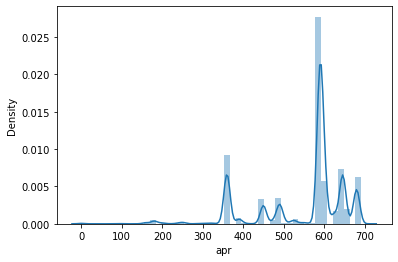

distribution of  nPaidOff
count    577658.000000
mean          0.037887
std           0.333366
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: nPaidOff, dtype: float64


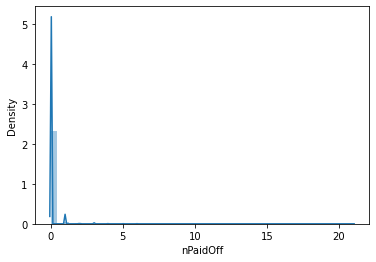

distribution of  loanAmount
count    575432.000000
mean        514.245084
std         320.939929
min           0.000000
25%         350.000000
50%         500.000000
75%         500.000000
max        5000.000000
Name: loanAmount, dtype: float64


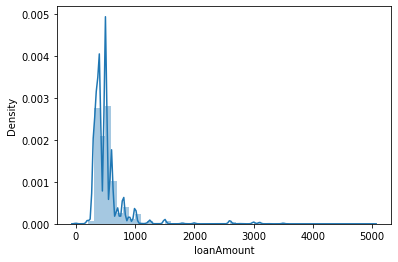

distribution of  originallyScheduledPaymentAmount
count    577682.000000
mean       1428.897209
std         925.009141
min        -816.710000
25%        1023.640000
50%        1245.250000
75%        1615.660000
max       19963.630000
Name: originallyScheduledPaymentAmount, dtype: float64


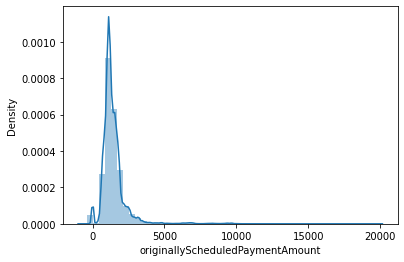

distribution of  leadCost
count    577682.000000
mean          7.854389
std          12.853451
min           0.000000
25%           3.000000
50%           3.000000
75%           6.000000
max         200.000000
Name: leadCost, dtype: float64


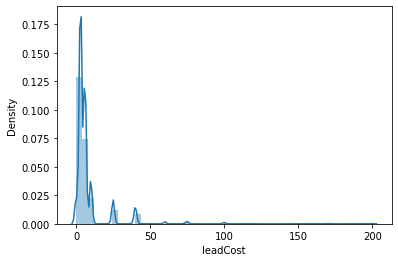

In [ ]:
for i in predictors:
  print('distribution of ' , i)
  print(loan[i].describe())
  sns.distplot(loan.loc[np.isnan(loan[i]) == 0 ,:][i])
  plt.show()

### From the above plots and distribution we notice : 
1- almost all scale variables are skewed to the right  , containing outliers , that gives an impression of the need to a transformation to (normalize) them or to get rid of this skewness as we will do later.

2- also the variable "originallyScheduledPaymentAmount" contains values less than 0 


In [ ]:
len(loan.loc[loan['originallyScheduledPaymentAmount'] >0 , :]) / len(loan)

0.9793606170869094

it is a low percentage of the sample size so we drop it 

we could also have replaced it by the value of "loanAmount"

In [ ]:
loan=loan.loc[loan['originallyScheduledPaymentAmount'] >0 , :]

### Then we study the distribution of categorical variables

In [ ]:
predictors_2=['payFrequency' ,'state','loanStatus' , 'leadType' ,  'hasCF' , 'approved' ]

distribution of : payFrequency


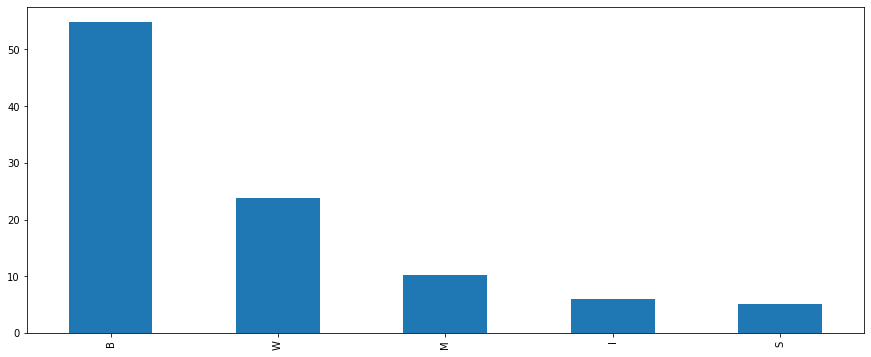

distribution of : state


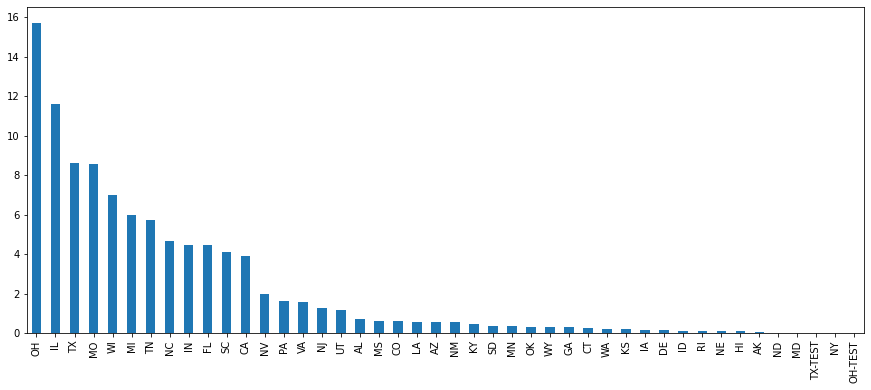

distribution of : loanStatus


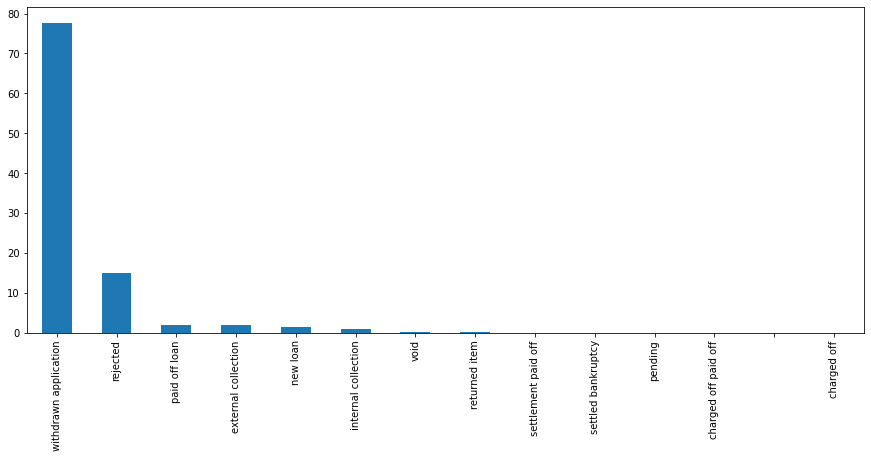

distribution of : leadType


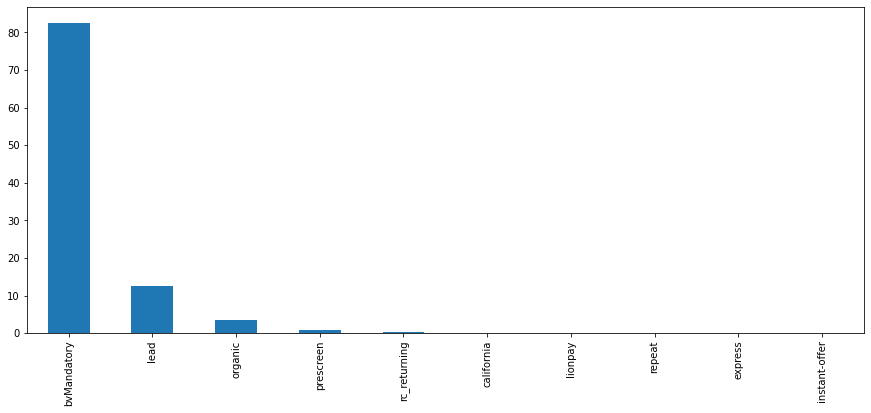

distribution of : hasCF


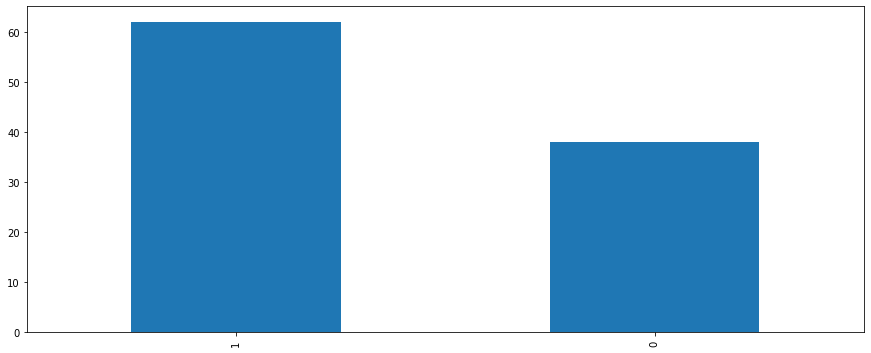

distribution of : approved


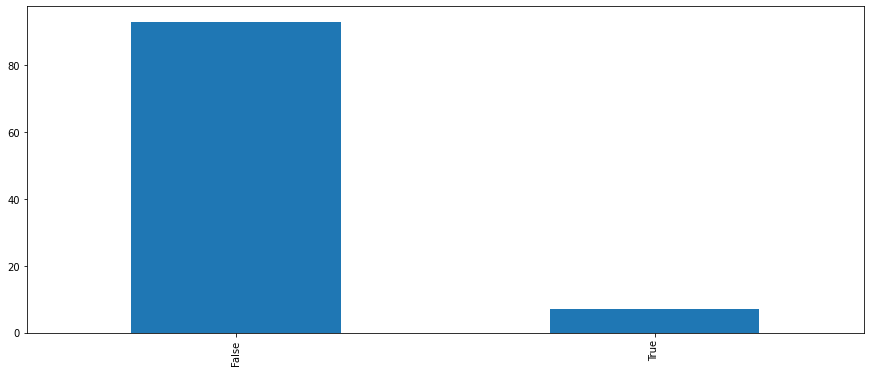

In [ ]:
for i in predictors_2 :
  print('distribution of : '+ i)
  plt.figure(figsize=(15,6))

  np.round(loan[i].value_counts(normalize=True)*100 ,2).plot(kind='bar' , label=True)
  plt.show()

We notice that , with the exception of State , there is a dominent category in each categorical variable , so , if needed , we can merge some cactegories in later steps to ease the process

### Now we study some relationships between variables

We start by studying correlation matrix between scale variables 


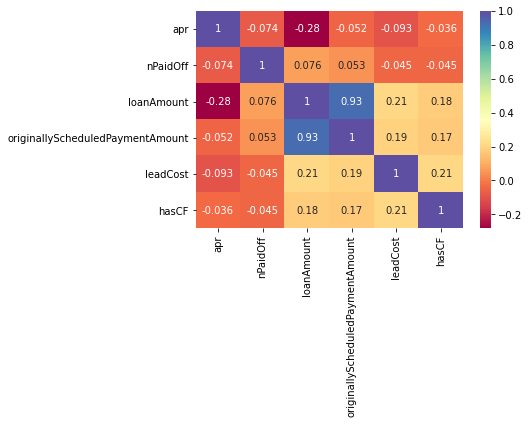

In [ ]:
sns.heatmap(loan.select_dtypes(include=['float' , 'int']).drop(columns=['isFunded']).corr() , cmap = "Spectral" , annot=True)

we notice absense of ant strong relationships except etween loan amount and originaly scheduled payment amount for the clear reason that 
the second = the first + fees and apr

Up to that point if we had to predict some thing we may predict , it is whether or not loan is funded , and which factors that affect the decision of funding a loan

Is there a significance difference in apr for each status
 
                df        sum_sq       mean_sq            F  PR(>F)
isFunded       1.0  2.775493e+07  2.775493e+07  2342.997328     0.0
Residual  564114.0  6.682442e+09  1.184591e+04          NaN     NaN
 
'apr' differs significantly between funded and non funded loans
 


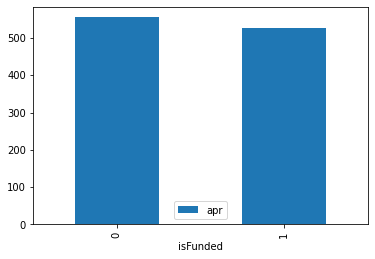

________________________
 
Is there a significance difference in nPaidOff for each status
 
                df        sum_sq      mean_sq            F  PR(>F)
isFunded       1.0   4698.847164  4698.847164  46494.72002     0.0
Residual  565733.0  57174.081299     0.101062          NaN     NaN
 
'nPaidOff' differs significantly between funded and non funded loans
 


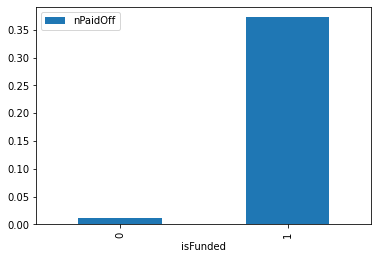

________________________
 
Is there a significance difference in loanAmount for each status
 
                df        sum_sq       mean_sq            F  PR(>F)
isFunded       1.0  6.624489e+08  6.624489e+08  6642.355044     0.0
Residual  565757.0  5.642353e+10  9.973103e+04          NaN     NaN
 
'loanAmount' differs significantly between funded and non funded loans
 


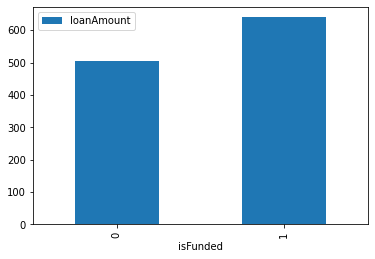

________________________
 
Is there a significance difference in originallyScheduledPaymentAmount for each status
 
                df        sum_sq       mean_sq            F  PR(>F)
isFunded       1.0  3.627454e+09  3.627454e+09  4405.869158     0.0
Residual  565757.0  4.658008e+11  8.233231e+05          NaN     NaN
 
'originallyScheduledPaymentAmount' differs significantly between funded and non funded loans
 


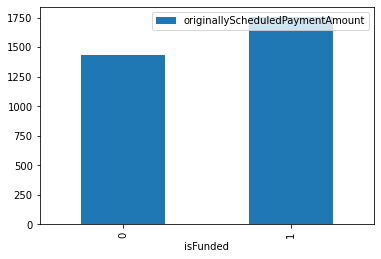

________________________
 
Is there a significance difference in leadCost for each status
 
                df        sum_sq        mean_sq            F  PR(>F)
isFunded       1.0  6.816340e+05  681634.046106  4139.717811     0.0
Residual  565757.0  9.315592e+07     164.657128          NaN     NaN
 
'leadCost' differs significantly between funded and non funded loans
 


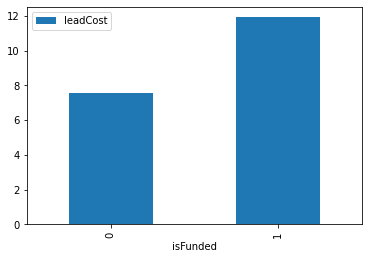

________________________
 


In [ ]:
for i in predictors:
       print('Is there a significance difference in' + ' '+ i + ' ' +'for each status')
       print(' ')
       f = sm.stats.anova_lm(ols('{} ~ isFunded'.format(i), data=loan).fit()) #one way anova to check significance of relationship
       print(f)
       print(' ')
       if  f.iloc[0,4] <0.05 : print("'" +i +"'" + ' differs significantly between funded and non funded loans')
       print(' ')
       loan.pivot_table(index='isFunded' , values= i , aggfunc='mean').plot(kind='bar') #plot for the mean across categories to check direction of relationship

       plt.show()
       print('________________________')
       print(' ')

### From the above we conclude : 

1- apr is significantly higher in loans that are not funded

2- number of loans that were paid of by the same borrower is clearly higher amoung loans that were funded

3 - originallyScheduledPaymentAmount is significantly higher in loans that are  funded

4 - the same for lead cost

### Also we check how distribution of " loan status" and "lead type " differs between funded and non funded loans

In [ ]:
table = loan.pivot_table(index='loanStatus' , columns='isFunded' , values='loanId' , aggfunc='count' , margins=True , margins_name='total').replace( np.nan,0)

In [ ]:
table=table.div( table.iloc[:,-1], axis=0 )*100 

In [ ]:
status_counts = pd.DataFrame(loan.groupby(['isFunded'])['loanStatus'].value_counts(normalize=True).rename('percentage').reset_index().sort_values('isFunded'))

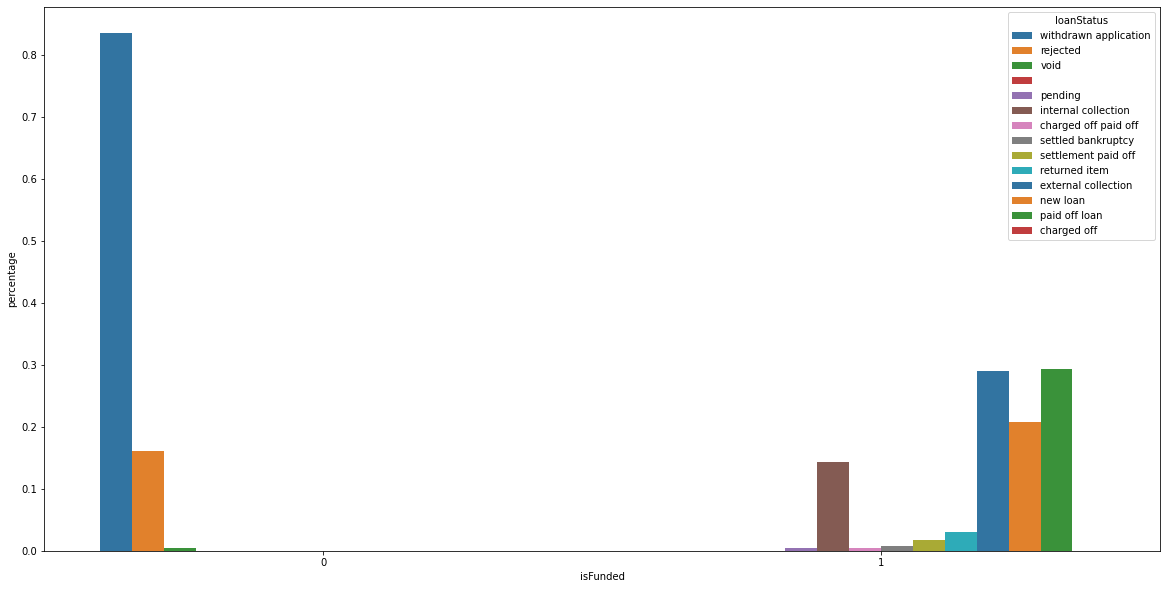

In [ ]:

plt.figure(figsize=(20,10))
p = sns.barplot(x="isFunded", y="percentage", hue="loanStatus", data=status_counts , palette="tab10")



We see that in the non funded loans most of them are withdrawn applications , and some are rewjected , also we see some variability amond funded loans , but the most frequent status are paid off and external collection.

### Now how lead type is distributed between funded and non funded loans

In [ ]:
lead_counts = pd.DataFrame(loan.groupby(['isFunded'])['leadType'].value_counts(normalize=True).rename('percentage').reset_index().sort_values('isFunded'))

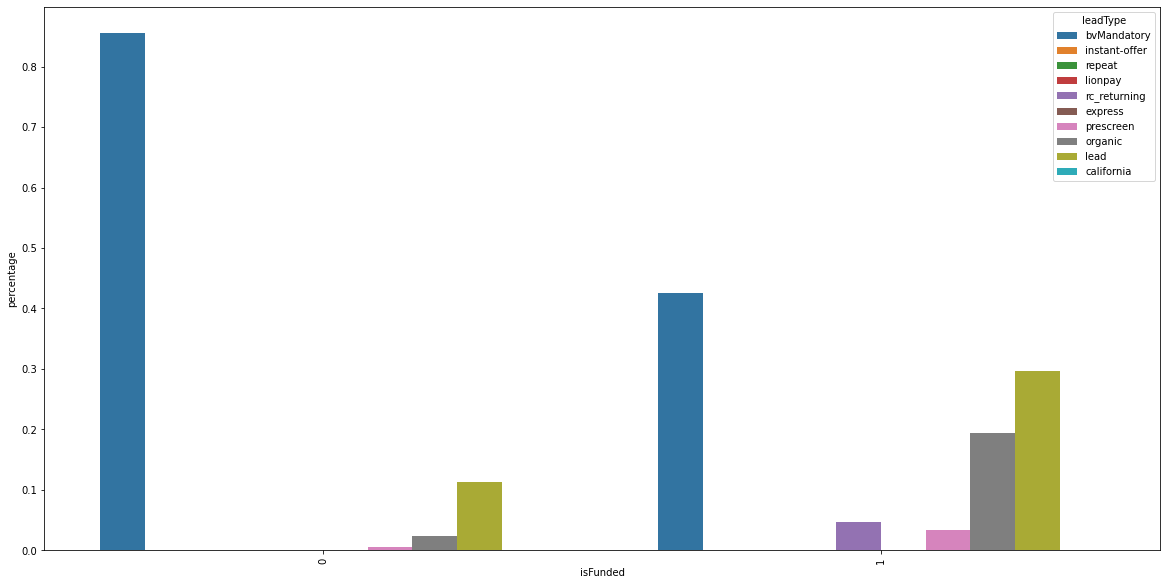

In [ ]:

plt.figure(figsize=(20,10))
p = sns.barplot(x="isFunded", y="percentage", hue="leadType", data=lead_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

we see that the most frequent lead type geneally is by mendatory , but there is more variability in funded loans than in non funded.

### Here also we check presence of missing values and whether variables are stored in correct data types

In [ ]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanId             689364 non-null  object 
 1   installmentIndex   689364 non-null  int64  
 2   isCollection       689364 non-null  bool   
 3   paymentDate        689364 non-null  object 
 4   principal          689364 non-null  float64
 5   fees               689364 non-null  float64
 6   paymentAmount      689364 non-null  float64
 7   paymentStatus      689364 non-null  object 
 8   paymentReturnCode  31533 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


### B - Payment

In [ ]:
payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


we store payment date as a date time rather than object

In [ ]:
payment['paymentDate'] = payment['paymentDate'].apply(lambda x : datetime.strptime(x[0:10], '%Y-%m-%d')
)

#### As understood from dictionary , the payment that is actually calculated is the checked payment

As well , the payment of type "None" not yet has to be paid so we need to take that into consideration while stufying quality of payment that 

In [ ]:
payment ['check'] = payment['paymentStatus']== 'Checked'
payment ['not_yet'] = payment['paymentStatus']== 'None'
payment['checked_payments'] = payment['paymentAmount'] * payment ['check'] 
payment['future_payments'] = payment['paymentAmount'] * payment ['not_yet'] 

we notice that we need to aggregate payment data to merge that to loans , and calculate total payments

1- we need to get sum of checked payment as the total amount paid

2- also amount of amount "future payment" as an indicator for amount that to be paid later

3 - and max "payment date" to help us to calculate loan term (later we will call it loan period)

4 - number of installments for each loan

In [ ]:
payment_agg = payment.groupby(by=['loanId']).agg({'checked_payments' : 'sum' ,
                                                  'future_payments' : 'sum' ,
                                                  'check' : 'sum',
                                                  'not_yet':'sum'  ,    
                  
                                                                            'paymentDate' : 'max' , 
                                                                            'installmentIndex' : 'count' 
                                                                             })

### C - Clarity under writing 

### Regarding clarity data we study distributions first 

In [ ]:
clarity_underwriting_variable.head()

,CF.fs.bof_ssn_date_unverified,CF.fs.bof_ssn_deceased,CF.fs.credit_prior_age_18,CF.fs.credit_prior_ssn_date,CF.fs.cur_addr_rep_newtrade_only,CF.fs.cur_addr_rep_trade_90_days,CF.fs.dl_format_invalid,CF.fs.dl_inconsistent_wof,CF.fs.in_ssn_date_unverified,CF.fs.in_ssn_deceased,CF.fs.in_ssn_invalid,CF.fs.inq_addr_cautious,CF.fs.inq_addr_high_risk,CF.fs.inq_addr_non_residential,CF.fs.inq_age_lt_ssn_date,CF.fs.inq_current_addr_nof,CF.fs.inq_gt_3_in_last_30_days,CF.fs.inq_onf_addr_conflict,CF.fs.max_num_ssn_ba,CF.fs.onf_addr_cautious,CF.fs.onf_addr_high_risk,CF.fs.onf_addr_non_residential,CF.fs.phone_inconsistent_w_addr,CF.fs.phone_inconsistent_w_state,CF.fs.ssn_belongs_to_another,CF.fs.ssn_frequent_for_another,CF.fs.total_num_fraud_indicators,CF.fs.work_num_prev_cell_num,CF.fs.work_num_prev_home_num,CF.inquiry.1_hr_ago,CF.inquiry.1_min_ago,CF.inquiry.10_mins_ago,CF.inquiry.15_days_ago,CF.inquiry.24_hrs_ago,CF.inquiry.30_days_ago,CF.inquiry.365_days_ago,CF.inquiry.7_days_ago,CF.inquiry.90_days_ago,CF.match.name_addr,CF.match.name_addr_reason_code,CF.match.name_addr_code_desc,CF.match.oa_reason_code,CF.match.oa_result,CF.match.ssn_dob_reason_code,CF.match.phonematchtypedescription,CF.match.ssn_name,CF.match.ssn_name_reason_code,CF.match.ssn_name_code_desc,CF.match.phone_match_result,CF.match.phone_match_type,CF.match.phone_type,CF.match.ssndobmatch,clearFraudScore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,partial,M,NaN,unavailable,(A8) Match to Last Name only,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,True,False,False,1.0,False,False,False,False,NaN,False,False,match,mismatch,M,NaN,unavailable,NaN,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,2.0,False,False,False,False,NaN,True,False,match,match,M,NaN,unavailable,NaN,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,mismatch,M,NaN,unavailable,NaN,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,False,False,False,False,1.0,False,False,False,False,NaN,False,False,match,match,M,NaN,unavailable,NaN,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


In [ ]:
predictors = []

for i in clarity_underwriting_variable.columns:
  if clarity_underwriting_variable.dtypes[i] != 'object' :
    predictors.append(i)
  else :
    continue

distribution of  CF.fs.bof_ssn_date_unverified
count    49750.000000
mean         7.313628
std          6.327122
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         89.000000
Name: CF.fs.bof_ssn_date_unverified, dtype: float64


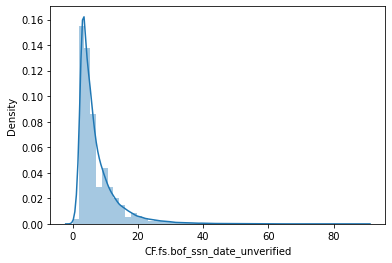

distribution of  CF.fs.bof_ssn_deceased
count    49750.000000
mean         4.601990
std          3.302288
min          0.000000
25%          3.000000
50%          3.000000
75%          5.000000
max         60.000000
Name: CF.fs.bof_ssn_deceased, dtype: float64


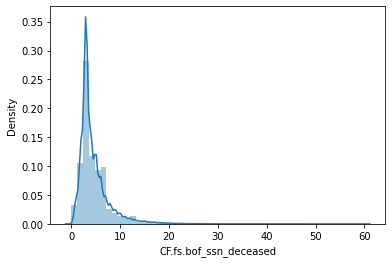

distribution of  CF.fs.credit_prior_age_18
count    49750.000000
mean         2.343980
std          1.436345
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max         16.000000
Name: CF.fs.credit_prior_age_18, dtype: float64


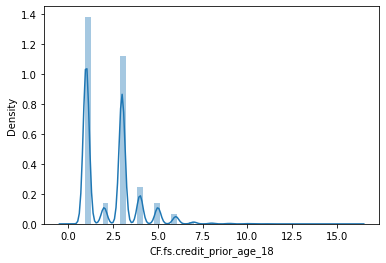

distribution of  CF.fs.credit_prior_ssn_date
count    49750.000000
mean         4.006874
std          2.697831
min          0.000000
25%          3.000000
50%          3.000000
75%          5.000000
max         42.000000
Name: CF.fs.credit_prior_ssn_date, dtype: float64


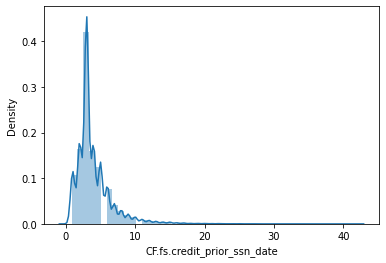

distribution of  CF.fs.cur_addr_rep_newtrade_only
count    49750.000000
mean        10.554513
std         10.450845
min          0.000000
25%          4.000000
50%          7.000000
75%         13.000000
max        202.000000
Name: CF.fs.cur_addr_rep_newtrade_only, dtype: float64


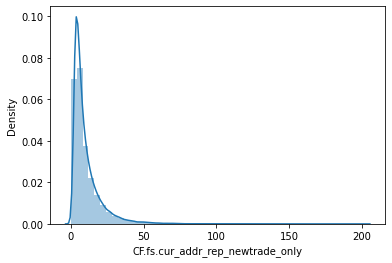

distribution of  CF.fs.cur_addr_rep_trade_90_days
count    49750.000000
mean         5.423799
std          4.110483
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         64.000000
Name: CF.fs.cur_addr_rep_trade_90_days, dtype: float64


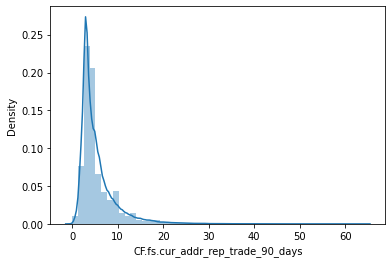

distribution of  CF.fs.dl_format_invalid
count    49750.000000
mean         3.292121
std          2.109667
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         35.000000
Name: CF.fs.dl_format_invalid, dtype: float64


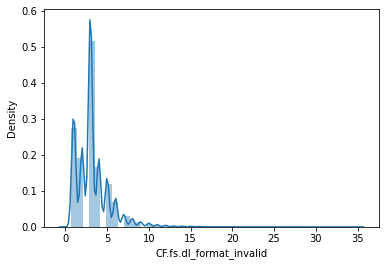

distribution of  CF.fs.dl_inconsistent_wof
count    49750.000000
mean         6.155578
std          4.952620
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         83.000000
Name: CF.fs.dl_inconsistent_wof, dtype: float64


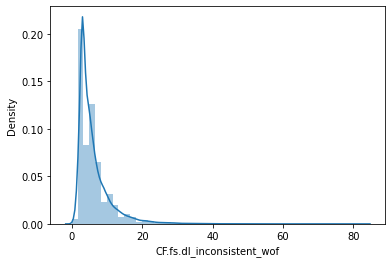

distribution of  CF.fs.in_ssn_date_unverified
count    49750.000000
mean        20.302291
std         23.771239
min          0.000000
25%          6.000000
50%         12.000000
75%         25.000000
max        438.000000
Name: CF.fs.in_ssn_date_unverified, dtype: float64


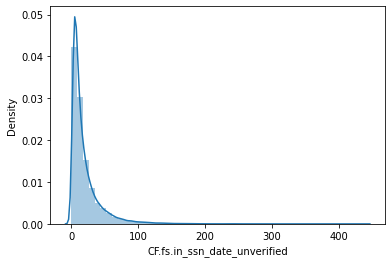

distribution of  CF.fs.in_ssn_invalid
count    49735.000000
mean         2.118327
std          1.254602
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: CF.fs.in_ssn_invalid, dtype: float64


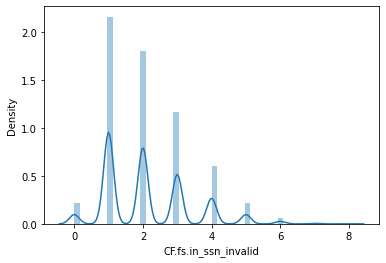

distribution of  CF.inquiry.1_min_ago
count    49735.000000
mean         7.202554
std         79.908530
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4056.000000
Name: CF.inquiry.1_min_ago, dtype: float64


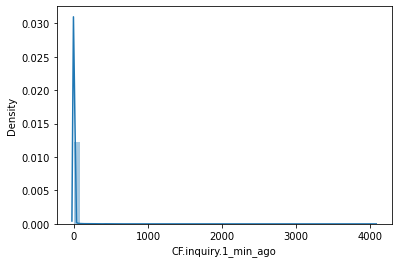

distribution of  CF.match.ssndobmatch
count    49720.000000
mean        11.728842
std         14.116701
min          1.000000
25%          1.000000
50%         11.000000
75%         15.000000
max        125.000000
Name: CF.match.ssndobmatch, dtype: float64


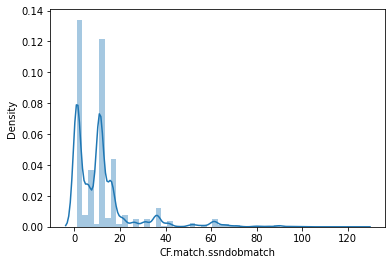

distribution of  clearFraudScore
count    49615.000000
mean       683.769787
std        126.205372
min        122.000000
25%        592.000000
50%        691.000000
75%        783.000000
max        965.000000
Name: clearFraudScore, dtype: float64


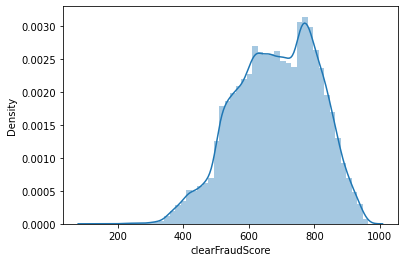

In [ ]:
for i in predictors:
  print('distribution of ' , i)
  print(clarity_underwriting_variable[i].describe())
  sns.distplot(clarity_underwriting_variable.loc[np.isnan(clarity_underwriting_variable[i]) == 0 ,:][i])
  plt.show()

As in loans data , we notice skewness and presense of outliers in almost all scale vaiables , as well we will get rid of that in the same way before modeling , taking a power transformation

We notice the large size of the dataset , to minimize dataset size , we drop variables that are corelated with other variables , in the scale variables we can use correlation coeffecient for this task , but here , in the categorical variables we use (Chi - squared contengence test)

to find variables that are dependent on other variables and exclude them

In [ ]:
object_predictors = clarity_underwriting_variable.select_dtypes(include=['object']).columns # getting categorical variables
import itertools
mat = list(itertools.combinations(object_predictors[:-1], 2)) # getting all binary combinations of categorical variables

In [ ]:
drop =[]
for i in range(len(mat)) : 
  a , b = mat[i][0] , mat[i][1]
  table = pd.pivot_table(clarity_underwriting_variable, columns=b , index=a ,
                         values='underwritingid',aggfunc='count' ,
                         margins = True , margins_name= 'row').replace(np.nan,0)# getting contingency tables
 
  p = chi2_contingency( table, lambda_="log-likelihood")[1] # getting p - value of chi - squared contingenncy test
  if p < 0.05 :             drop.append(b)# if relationship significant drop one of the variables fom the data
  else :  pass


In [ ]:
drop_clarity1=list(set(drop)) # the first set to drop (dependent categorical variables)

Then , we study correlation between scale variables

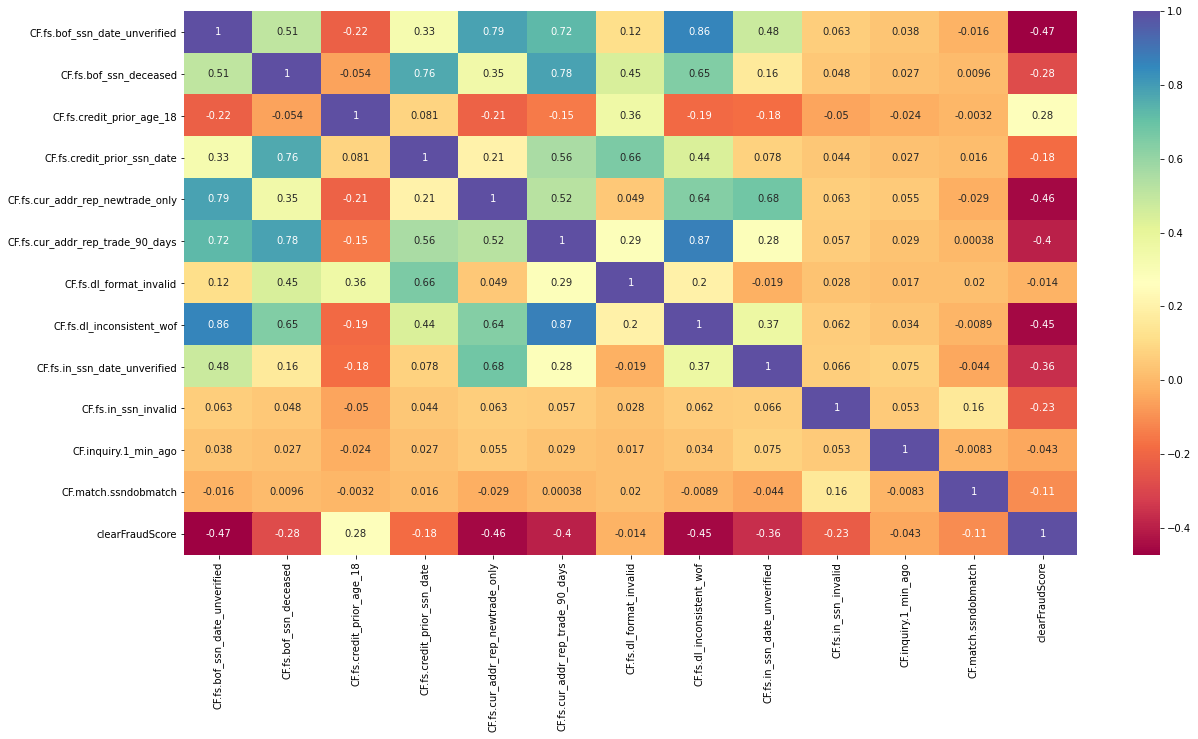

In [ ]:
plt.figure(figsize=(20,10))

sns.heatmap(clarity_underwriting_variable.select_dtypes(exclude=['object']).corr() , cmap = "Spectral" , annot=True)

we notice that there are some variables that are correlated with several variables , so we drop them

In [ ]:
drop_clarity2 = ['CF.fs.dl_inconsistent_wof' , 'CF.fs.cur_addr_rep_trade_90_days' , 
                 'CF.fs.cur_addr_rep_newtrade_only','CF.inquiry.1_min_ago'] # the second set to drop (dependent scale variables)

In [ ]:
new_clarity = clarity_underwriting_variable.drop(columns=drop_clarity1 ).drop (columns=drop_clarity2) # drop dependent variables

## Stage 2 : Composing dataset to use in prediction


### A - Merging datasets

### After studying characteristics of each data set, manupulating it , we start to compose our final dataset 

1 - Since we work on loans repayment , we will work only on funded loans

Also we merge "payment_agg" dataset to merge our dependent variable (checked payment)

In [ ]:
funded = loan.loc[loan.isFunded == 1].merge(right=payment_agg , on = 'loanId')

In [ ]:
funded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38878 entries, 0 to 38877
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loanId                            38878 non-null  object        
 1   anon_ssn                          38878 non-null  object        
 2   payFrequency                      38878 non-null  object        
 3   apr                               38878 non-null  float64       
 4   applicationDate                   38878 non-null  datetime64[ns]
 5   originated                        38878 non-null  bool          
 6   originatedDate                    38878 non-null  object        
 7   nPaidOff                          38857 non-null  float64       
 8   approved                          38878 non-null  bool          
 9   isFunded                          38878 non-null  int64         
 10  loanStatus                        38878 non-nu

In [ ]:
funded.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,checked_payments,future_payments,check,not_yet,paymentDate,installmentIndex
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19,True,2016-01-20T15:49:18.846000,0.0,True,1,paid off loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,6287.08,0.00,22,0,2016-12-14,25
1,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28,True,2016-11-29T20:30:40.640000,2.0,True,1,new loan,350.0,893.88,MO,organic,0,Checked,NaN,0,481.39,343.72,7,5,2017-05-26,13
2,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01,True,2017-03-01T16:15:13.016000,0.0,True,1,new loan,400.0,1364.87,NJ,lead,40,Checked,58b6eef8e4b0b6fca82fd426,1,0.00,1256.01,0,24,2017-09-01,26
3,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31,True,2017-01-31T18:00:14.520000,2.0,True,1,paid off loan,1250.0,3313.78,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,1333.75,0.00,1,0,2017-07-31,13
4,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27,True,2016-08-29T15:05:04.014000,0.0,True,1,paid off loan,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1,2432.08,0.00,13,0,2017-02-24,13


2 -  Also History of the borrower is of our intrest , we will have to know the credit histoy of the borrower (i.e the status of loans that he had borrowed before this loan)



In [ ]:
hist=funded.loc[: , ['loanId','anon_ssn' ,  'applicationDate']].merge(funded.loc[: , ['anon_ssn' , 'loanStatus' , 'applicationDate']] ,how='left' ,on='anon_ssn') 

In [ ]:
hist=pd.get_dummies(hist.loc[hist['applicationDate_x'] > hist['applicationDate_y'] #we choose status of loans that borrower applied for before this loan
                             , ['loanId' , 'anon_ssn', 'loanStatus']  ] ,
                    columns=['loanStatus']) .groupby('anon_ssn').sum()

3 - Also we may be interested in loans that were not funded for a specific borrower , (i.e if a borrower has a several withdrawn applications it may be an indicator that borrower is not serious enough. 

In [ ]:
non_funded = loan.loc[loan.isFunded == 0 , ['loanId' , 'anon_ssn' ,'payFrequency' ,'applicationDate','loanStatus'] ]

In [ ]:
non_funded=pd.get_dummies(non_funded , columns=['payFrequency' ,'loanStatus'])

In [ ]:
non_funded.head()

,loanId,anon_ssn,applicationDate,payFrequency_B,payFrequency_I,payFrequency_M,payFrequency_S,payFrequency_W,loanStatus_,loanStatus_charged off paid off,loanStatus_internal collection,loanStatus_pending,loanStatus_rejected,loanStatus_void,loanStatus_withdrawn application
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,2016-02-23,1,0,0,0,0,0,0,0,0,0,0,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,2016-08-01,1,0,0,0,0,0,0,0,0,0,0,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,2015-08-06,1,0,0,0,0,0,0,0,0,0,0,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,2016-06-05,1,0,0,0,0,0,0,0,0,1,0,0
5,LL-I-09734486,b5541f49472fa0fce8e473306768f7fb,2016-06-12,0,0,1,0,0,0,0,0,0,0,0,1


since "withdrawn_application" and "Rejected" are the dominent categories among non funded category so we extract them only 

In [ ]:
non_funded_agg=non_funded.groupby('anon_ssn').agg({'loanStatus_withdrawn application' : 'sum' , 'loanStatus_rejected':'sum'})

In [ ]:
non_funded_agg.columns=['n_withdrawn' , 'n_rejected']

then we merge non funded loans for each borrower 

In [ ]:
funded_merged=funded.merge(hist , how='left' , on='anon_ssn').merge(non_funded_agg , how='left' , on='anon_ssn')



then we merge clarity 

In [ ]:
funded_merged=funded_merged.merge(new_clarity ,how='left' , left_on='clarityFraudId' , right_on='underwritingid')

### B - Generating more features

we calculate the loan term by days , as an estimate , 
we calculate the difference between application date and last payment date

In [ ]:
funded_merged['loan_term'] = funded_merged['paymentDate'] - funded_merged['applicationDate']

Since we are only interested in loans  that have outstanding amount (i.e , when we have a new loan that the first payment should be after one month , this will not help us in prediction) , so we drop such cases

In [ ]:
funded_merged=funded_merged.loc[funded_merged['not_yet'] != funded_merged['installmentIndex']]
#calculating the pecentage of loan that should have been paid (i.e excluding percentage of payments that should be paid in the future)

funded_merged['outstanding_pct'] = (funded_merged['originallyScheduledPaymentAmount'] - funded_merged['future_payments'])/funded_merged['originallyScheduledPaymentAmount']



In [ ]:
funded_merged = funded_merged.loc[funded_merged['outstanding_pct'] >0 ,:]

One factor that may be of intrest is precentage of fees (apr + other fees) of the total amount that borrower has to repay  

In [ ]:
funded_merged['fees_pct'] = (funded_merged['originallyScheduledPaymentAmount'] -funded_merged['loanAmount'])/funded_merged['originallyScheduledPaymentAmount']


Since we will get dummies for all categorical variables , we take top 20 states and recode other states into "other" in order not to make final data larder than we need 

In [ ]:
top_20 = funded_merged['state'].value_counts(normalize=True)[:20].keys()

In [ ]:
funded_merged['state'] =funded_merged['state'].apply(lambda x : np.where (x in 
top_20 ,x , 'other'))

In [ ]:
funded_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37170 entries, 0 to 38877
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   loanId                            37170 non-null  object         
 1   anon_ssn                          37170 non-null  object         
 2   payFrequency                      37170 non-null  object         
 3   apr                               37170 non-null  float64        
 4   applicationDate                   37170 non-null  datetime64[ns] 
 5   originated                        37170 non-null  bool           
 6   originatedDate                    37170 non-null  object         
 7   nPaidOff                          37149 non-null  float64        
 8   approved                          37170 non-null  bool           
 9   isFunded                          37170 non-null  int64          
 10  loanStatus                        

### C - Replacing Missing values

We notice presense of missing values in the fields related to clarity dataset ", this is because they are missing in case of hasCF=0 , so we estimate them using mean across "leadType" categories 

In [ ]:
#selecting felds that need to replace missing
replace_missing_fields =['CF.fs.bof_ssn_date_unverified'	,'CF.fs.bof_ssn_deceased',	
      'CF.fs.credit_prior_age_18',	'CF.fs.credit_prior_ssn_date',
      'CF.fs.dl_format_invalid',	'CF.fs.in_ssn_date_unverified',	'CF.fs.in_ssn_invalid',	'CF.match.ssndobmatch']


In [ ]:
replace_missing_data=funded_merged.groupby('leadType')[replace_missing_fields].mean() 
#getting means for these fields across 'leadType' categories

In [ ]:
replace_missing_data.columns=['CF.fs.bof_ssn_date_unverified_y'	,'CF.fs.bof_ssn_deceased_y',	
      'CF.fs.credit_prior_age_18_y',	'CF.fs.credit_prior_ssn_date_y',
      'CF.fs.dl_format_invalid_y',	'CF.fs.in_ssn_date_unverified_y',	'CF.fs.in_ssn_invalid_y',	'CF.match.ssndobmatch_y']
#changing names of calculated fields in order to mege it to our main dataset

In [ ]:
funded_merged=funded_merged.merge(replace_missing_data , on='leadType') # merging helping fields to our dataset

In [ ]:
for i  in range(len(replace_missing_fields))  : # replacing missing values
 
    funded_merged[replace_missing_fields[i]]= np.where(np.isnan(funded_merged[replace_missing_fields[i]]) == 1 
                                                       ,funded_merged[replace_missing_data.columns[i]],
                                                       funded_merged[replace_missing_fields[i]])


In [ ]:
funded_merged.drop(columns=replace_missing_data.columns , inplace=True) # dopping helping fields

then we drop fields that will not help us in prediction process (i.e loan status is a variable based on payment behaviour , if a borrower fails to pay on time for several times so it turns to collection , so it has no meaning to include it among predictors)

In [ ]:
funded_merged.drop(columns=['loanStatus','applicationDate','paymentDate','check','not_yet','approved','loanAmount','originatedDate'
        ,'originated' , 'isFunded' , 'clarityFraudId' ,'underwritingid' , 'future_payments' ] , inplace=True)

In [ ]:
funded_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37170 entries, 0 to 37169
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   loanId                            37170 non-null  object         
 1   anon_ssn                          37170 non-null  object         
 2   payFrequency                      37170 non-null  object         
 3   apr                               37170 non-null  float64        
 4   nPaidOff                          37149 non-null  float64        
 5   originallyScheduledPaymentAmount  37170 non-null  float64        
 6   state                             37170 non-null  object         
 7   leadType                          37170 non-null  object         
 8   leadCost                          37170 non-null  int64          
 9   fpStatus                          37170 non-null  object         
 10  hasCF                             

There is still missing values in the fields related to CL , we replace them by the general average

In [ ]:
funded_merged.loc[: ,replace_missing_fields].fillna(funded_merged.loc[: ,replace_missing_fields].mean(), inplace=True)

we notice that we still have missing values 
several of them were due to meging (i.e only 7569 loans their borrowers had borrowed loans before) 

### this indicates that we may have made a better prediction if we had more info about borrower , his income , credit history , and so on.

Any ways , regarding missing values remaining we will have to replace them with zero after taking one hot encoding for categorical variables

### D - Encoding categorical predictors

In [ ]:
scale=funded_merged.select_dtypes(exclude=['object']).columns 

In [ ]:
# getting the list of non scale variables that we newed in prediction to encode them
non_scale=list(set(funded_merged.select_dtypes(include=['object']).columns )- set(['loanId','anon_ssn','applicationDate','paymentDate','check','isCollection','not_yet','approved','loanAmount','originatedDate',
        'apr','originated' , 'isFunded' , 'clarityFraudId' ,'underwritingid' , 'future_payments','checked_payments' ,'payment_pct']))

In [ ]:
# generating one hot encoding for categorical variables
funded_final=pd.get_dummies(funded_merged,columns=non_scale, drop_first=True) .replace(np.nan,0)

In [ ]:
funded_final.index = funded_final['loanId']
funded_final.drop(columns=['loanId','anon_ssn'] , inplace=True)

In [ ]:
funded_final['loan_term']=funded_final['loan_term']/ (np.timedelta64(1, 's')*(60*60*24))

In [ ]:
funded_final.head()

,apr,nPaidOff,originallyScheduledPaymentAmount,leadCost,hasCF,checked_payments,installmentIndex,loanStatus_charged off paid off,loanStatus_external collection,loanStatus_paid off loan,loanStatus_settlement paid off,n_withdrawn,n_rejected,CF.fs.bof_ssn_date_unverified,CF.fs.bof_ssn_deceased,CF.fs.credit_prior_age_18,CF.fs.credit_prior_ssn_date,CF.fs.dl_format_invalid,CF.fs.in_ssn_date_unverified,CF.fs.in_ssn_invalid,CF.match.ssndobmatch,clearFraudScore,loan_term,outstanding_pct,fees_pct,CF.fs.onf_addr_high_risk_True,state_CA,state_CO,state_CT,state_FL,state_IL,state_IN,state_MI,state_MN,state_MO,state_NC,state_NJ,state_NV,state_OH,state_PA,state_SC,state_TN,state_TX,state_VA,state_WI,state_other,CF.fs.in_ssn_deceased_True,CF.fs.inq_addr_non_residential_True,fpStatus_Checked,fpStatus_Pending,fpStatus_Rejected,fpStatus_Returned,fpStatus_Skipped,payFrequency_I,payFrequency_M,payFrequency_S,payFrequency_W,CF.fs.inq_addr_high_risk_True,leadType_california,leadType_express,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,CF.fs.phone_inconsistent_w_state_True,CF.fs.inq_gt_3_in_last_30_days_True,CF.fs.inq_age_lt_ssn_date_True
loanId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LL-I-06644937,199.0,0.0,6395.19,0,1,6287.08,25,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,5.0,879.0,330.0,1.000000,0.530897,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
LL-I-09965603,325.0,0.0,4865.67,0,1,373.18,26,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,15.0,748.0,361.0,1.000000,0.691718,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
LL-I-11872855,199.0,0.0,6611.25,0,1,3230.70,12,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,9.0,0.0,5.0,824.0,358.0,0.511356,0.546228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
LL-I-08473772,360.0,0.0,791.26,0,1,408.29,14,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,5.0,774.0,184.0,1.000000,0.526072,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
LL-I-11462356,199.0,0.0,6651.74,0,1,2250.63,27,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,5.0,1.0,5.0,831.0,379.0,1.000000,0.548990,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


As mentioned above , before prediction we will need to take a power transformation to reduce skewness in our scale variable 

Let's check how this affects our dependent variable (I tried to make the dependent variable to be percentage of payment 

payment pct = (checked payment/ originaly scheduled payment amount - future payment)

 but it resulted in a lesser accuracy so i used checked payment instead

## Stage 3 : Prediction and model testing

### A - checking variability of dependent variable across selected features

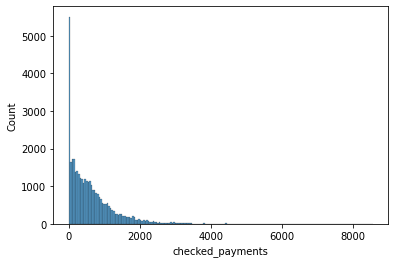

In [ ]:
sns.histplot(funded_merged['checked_payments'])

In [ ]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)

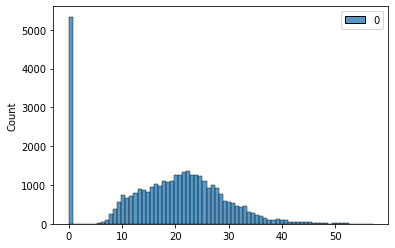

In [ ]:
Y = (funded_merged['checked_payments']).to_numpy().reshape((len(funded_merged['checked_payments']),1))

Y=pt.fit_transform(Y )
sns.histplot(Y)

before modeling , we need to make an indicator about how predictors affect our dependent variales

we run anova test to test significance of the relationship , then draw a plot to have an inferrence about pattern of relationship

#### checked payment vs fpStatus

In [ ]:

sm.stats.anova_lm(ols('{} ~ fpStatus'.format('checked_payments'), data=funded_merged).fit())

,df,sum_sq,mean_sq,F,PR(>F)
fpStatus,5.0,1.797242e+09,3.594484e+08,756.556553,0.0
Residual,37164.0,1.765703e+10,4.751110e+05,NaN,NaN


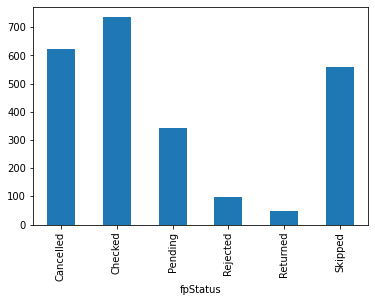

In [ ]:
funded_merged.groupby('fpStatus').mean()['checked_payments'].plot(kind='bar')

Here we notice a significant difference of check payments across fpStatus levels we notice that the least average check payment comes when the first payment is rejected or returned , while the highest is if the first payment is checked

#### checked payment vs state

In [ ]:
sm.stats.anova_lm(ols('{} ~ state'.format('checked_payments'), data=funded_merged).fit())

,df,sum_sq,mean_sq,F,PR(>F)
state,20.0,2.022148e+09,1.011074e+08,215.466566,0.0
Residual,37149.0,1.743212e+10,4.692487e+05,NaN,NaN


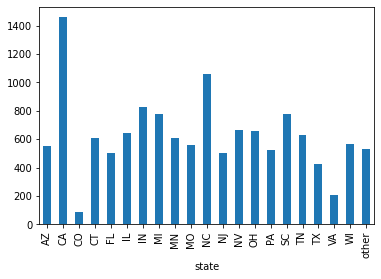

In [ ]:
funded_merged.groupby('state').mean()['checked_payments'].plot(kind='bar')

we here notice also that the highest average check payment comes from the state "california" while least average comes from "VA" and "CO"

#### checked payment vs outstanding pct

Text(0, 0.5, 'checked_payments')

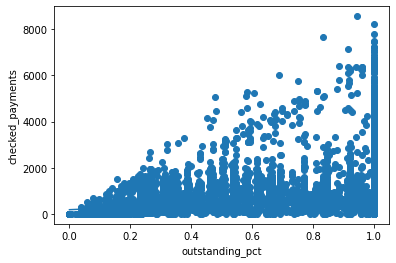

In [ ]:
Y=  funded_merged['checked_payments']
X = funded_merged['outstanding_pct']
results = sm.OLS(Y,sm.add_constant(X)).fit()

plt.scatter(X,Y)



plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.xlabel('outstanding_pct')
plt.ylabel('checked_payments')

fom the above we notice the positive relationship between pct of outstanding payment , and checked payment

### B - Transforming Data

### Then we take a power tranformation for  the dependent variable and the scale predictors to get rid of skewness

In [ ]:
from xgboost import XGBRegressor
Y = funded_final['checked_payments']



In [ ]:
X = funded_final.drop(columns=['checked_payments'])

In [ ]:
 X.loc[:,scale.drop('checked_payments')]=pt.fit_transform(X.loc[:,scale.drop('checked_payments')] )

In [ ]:
Y = (Y).to_numpy().reshape((len(Y),1))

Y=pt.fit_transform(Y )


### C - Fitting model

the final step before modeling is to split data into train and test sets to train and test ou model


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

We start by a random forest regression model to have an inferrence about prediction quality and to specify the most important variables in prediction process

We take R- squared goodness of fit as a measue of model quality

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators= 50 )
rf.fit(X_train, y_train)

print('Training Accuracy: {:.2f} '.format(rf.score(X_train, y_train)*100))
print('test Accuracy: {:.2f} '.format(rf.score(X_test, y_test)*100))

Training Accuracy: 96.37 
test Accuracy: 74.43 


Since R- squared threshold is 70% , so 75% on test set is good enough to go ahead 

WE detect the most important features to go ahead with them and search a better model , since it may be computational expensive , so we need to minimize the size of data

### So we rank features according to importance (i.e amount of variability explained in the dependent variable by each feature)


In [ ]:
features = funded_final.drop(columns=['checked_payments']).columns

In [ ]:

importances = rf.feature_importances_
indices = np.argsort(importances) # ranking features according to importance score

the plot below gives the ank of features according to importance score

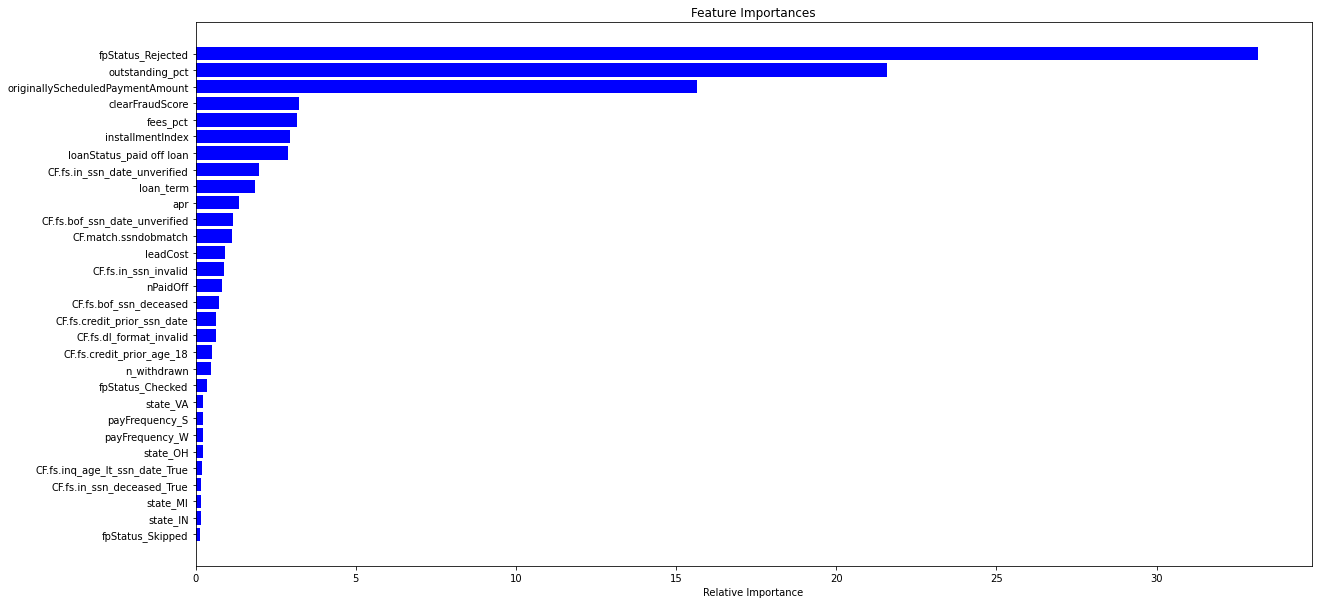

In [ ]:
# Plotting importance plot (taking top 30 features)
plt.figure(figsize=(20,10))

plt.title('Feature Importances')
plt.barh(range(len(indices[-30:])), importances[indices][-30:]*100, color='b', align='center')
plt.yticks(range(len(indices[-30:])), [get_display(arabic_reshaper.reshape(features[i])) for i in indices[-30:]])
plt.xlabel('Relative Importance')
plt.show()

then , let's compute how much variation explained in the top , let's say , 30 features

In [ ]:
importances[indices][-30:].sum()

0.9782233801139479

so we extract them , and rerun the random forest regressor again

In [ ]:
X = funded_final.drop(columns=['checked_payments']) #define data again
X=X.loc[: , features[indices[-30:]]]#select top importance field

In [ ]:
from scipy import stats

In [ ]:
selected_features = [ i for i in scale if i in X.columns] #select scale fields to transfom

In [ ]:
X.loc[:,selected_features]=pt.fit_transform(X.loc[:,selected_features] ) # transfom scale fields

then we rerun model again with selected features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators= 50 ,)
rf.fit(X_train, y_train)

print('Training Accuracy: {:.2f} '.format(rf.score(X_train, y_train)*100))
print('test Accuracy: {:.2f} '.format(rf.score(X_test, y_test)*100))

Training Accuracy: 96.31 
test Accuracy: 75.17 


###Finally seeking the best model , we use XGB regressor with grid search

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
# A parameter grid for XGBoost
params = {'min_child_weight':[2,3,4], 'gamma':[i/10.0 for i in [2,3,4]],  'subsample':[i/10.0 for i in range(5,8)],
'colsample_bytree':[i/10.0 for i in range(5,8)]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1 , max_depth=10 , n_estimators = 50 , learning_rate=0.2 , verbosity=0) 

grid = GridSearchCV(xgb, params)
grid.fit(X_train, y_train)

# Print the r2 score
print(r2_score(y_test, grid.best_estimator_.predict(X_test))) 
# Print the MSE score
print(mean_squared_error(y_test, grid.best_estimator_.predict(X_test)))

Note that we could have reached a better fit with better test R - squared (by increasing n_estimators , and max depth)but due to comutational power limitation we think that is enough

In [ ]:
grid.best_estimator_

Finally we extact datasets

In [ ]:
funded.to_csv('funded.csv')
non_funded.to_csv('non_funded.csv')
payment_agg.to_csv('payment_agg.csv')
new_clarity.to_csv('new_clarity.csv')
funded_merged.to_csv('funded_merged.csv')
funded_final.to_csv('funded_final.csv')